###  Overview  
Exploratory analysis of wikipedia-movies.json which contains data obtained from wikipedia.org of movies from 1990 to 2018.

In [216]:
#Impor dependencies
import json
import pandas as pd
import numpy as np
import re  # Regular expression module

In [12]:
#Create directory that links to our json file
file_dir = "C:\\Users\Singh Lab\Desktop\DataAnalyticsCourse\Module_8\course_work\movies_etl\\"

Now we can read the json file (DO NOT IMPORT AS A DATAFRAME!!) and do some cleanup. Then we can convert the cleaned up data into a dataframe.

In [13]:
#Load the json file
with open(f'{file_dir}wikipedia-movies.json', 'r') as file:
    wiki_movies_raw = json.load(file)

In [14]:
#Lets check how many records are in the file:
len(wiki_movies_raw)

7311

It is a good idea to stop right here and decide whether that count seems excessively large or small which could indicate a problem with the data. To be honest, 7311 seems like a small number considering the number of movies made over  28 year period

In [15]:
#Lets look at the dictionary structure and records:
wiki_movies_raw[5]

{'url': 'https://en.wikipedia.org/wiki/The_Ambulance',
 'year': 1990,
 'imdb_link': 'https://www.imdb.com/title/tt0099026/',
 'title': 'The Ambulance',
 'Directed by': 'Larry Cohen',
 'Produced by': ['Larry Cohen', 'Moctesuma Esparza', 'Robert Katz'],
 'Written by': 'Larry Cohen',
 'Starring': ['Eric Roberts',
  'James Earl Jones',
  'Red Buttons',
  'Megan Gallagher'],
 'Music by': 'Jay Chattaway',
 'Cinematography': 'Jacques Haitkin',
 'Edited by': ['Claudia Finkle', 'Armond Leibowitz'],
 'Productioncompany ': 'Epic Productions',
 'Distributed by': 'Triumph Releasing Corporation',
 'Release date': ['March 22, 1990', '(', '1990-03-22', ')'],
 'Running time': '95 minutes',
 'Country': 'United States',
 'Language': 'English'}

In [18]:
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [17]:
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

At a raw glance the data appears to be organized

In [738]:
#Load MovieLens data obtained from Kaggle.com and examine datafames in subsequent cells
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv')
ratings = pd.read_csv(f'{file_dir}ratings.csv')

D:\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [569]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.00,1425941529
1,1,147,4.50,1425942435
2,1,858,5.00,1425941523
3,1,1221,5.00,1425941546
4,1,1246,5.00,1425941556


In [570]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,"373,554,033.00",81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,"5,415.00"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,"262,797,249.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,"2,413.00"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,"81,452,156.00",127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,"76,578,911.00",106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


In [24]:
kaggle_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [25]:
ratings.tail()

,userId,movieId,rating,timestamp
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990
26024288,270896,71878,2.0,1257031858


In [571]:
ratings.sample(10)

,userId,movieId,rating,timestamp
23507408,243934,53956,3.50,1216069521
8269151,85254,186,3.50,1070574424
5155028,53118,5459,4.00,1080282162
64108,682,5421,3.50,1070836087
2613757,27190,91542,3.50,1458339431
3558487,37097,2088,4.00,1057599643
7578664,78317,162478,2.50,1486392041
18093667,187854,99112,1.00,1440176580
16805933,174674,1264,5.00,1101668592
18128888,188208,527,5.00,1453805113


In [572]:
kaggle_metadata.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.00,90.00,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.00,1.00
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.00,360.00,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.00,3.00
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.00,90.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.80,6.00
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.00,87.00,[],Released,NaN,Satan Triumphant,False,0.00,0.00
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.00,75.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.00,0.00


Now comes the lengthy process of dealing with the wikipedia data and cleaning it up. This involved multiple cycles of filtering, cleaning, and renaming and reformatting. Each cycle involves inspecting the data, coming up with a plan of attack and then executing that plan.

In [573]:
#Here we convert the wikipedia json data to a df
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [574]:
len(wiki_movies_df.columns)


193

In [575]:
list(wiki_movies_df.columns)

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

A look at this dataframe reveals quite a huge mess to cleanup along with a large number of columns of which many are not needed for our analysis. Cleaning up dataframes such as this is a very lengthy process with multiple iterations and lots of trial and error

Looking at the list of columns, we see a host of data we do not need such as: 'Number of employees' or 'Divisision'. Lets start by removing refining our dataframe to only include column values that we need. In this case entries with an imdb_link and director 

In [576]:
wiki_movies_df[['Directed by', 'Director', 'imdb_link']].head(50)

,Directed by,Director,imdb_link
0,Renny Harlin,NaN,https://www.imdb.com/title/tt0098987/
1,James Foley,NaN,https://www.imdb.com/title/tt0098994/
2,Roger Spottiswoode,NaN,https://www.imdb.com/title/tt0099005/
3,Woody Allen,NaN,https://www.imdb.com/title/tt0099012/
4,John Cornell,NaN,https://www.imdb.com/title/tt0099018/
5,Larry Cohen,NaN,https://www.imdb.com/title/tt0099026/
6,"[Barbara Kopple, Co-directors:, Cathy Caplan, ...",NaN,https://www.imdb.com/title/tt0099028/
7,Cedric Sundstrom,NaN,https://www.imdb.com/title/tt0101326/
8,Deborah Reinisch,NaN,https://www.imdb.com/title/tt0099037/
9,Eric Karson,NaN,https://www.imdb.com/title/tt0099039/


In [577]:
#Lets generate a list movies that have a director and imdb link using list comprehension
wiki_movies = [movie for movie in wiki_movies_raw if('Director' in movie or 
                                                     'Directed by' in movie) and 
                                                    'imdb_link' in movie]
len(wiki_movies)

7080

The number of movies is slightly lower. If we convert the result to a dataframe we are left with 78 columns as some columns become empty as result

Again if we go back and look at columns we see that 'No. of episodes' is a column indicating that we are dealing with TV shows in some cases as opposed to movies

In [578]:
#Lets modify our list comprehension to account for this:
wiki_movies = [movie for movie in wiki_movies_raw if('Director' in movie or 'Directed by' in movie) 
                                                  and 'imdb_link' in movie 
                                                  and 'No. of episodes' not in movie]


In [579]:
len(wiki_movies)

7076

In [580]:
#Convert to dataframe
wiki_movies_df_new = pd.DataFrame(wiki_movies)

In [581]:
#View dataframe
wiki_movies_df_new.head(10)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,https://en.wikipedia.org/wiki/The_Ambulance,1990,https://www.imdb.com/title/tt0099026/,The Ambulance,Larry Cohen,"[Larry Cohen, Moctesuma Esparza, Robert Katz]",NaN,NaN,NaN,"[Eric Roberts, James Earl Jones, Red Buttons, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,https://en.wikipedia.org/wiki/American_Dream_(...,1990,https://www.imdb.com/title/tt0099028/,American Dream,"[Barbara Kopple, Co-directors:, Cathy Caplan, ...","[Arthur Cohn, Barbara Kopple]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,https://en.wikipedia.org/wiki/American_Ninja_4...,1990,https://www.imdb.com/title/tt0101326/,American Ninja 4: The Annihilation,Cedric Sundstrom,Ovidio G Assonitis,NaN,NaN,NaN,"[Michael Dudikoff, David Bradley, James Booth,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,https://en.wikipedia.org/wiki/Andre%27s_Mother,1990,https://www.imdb.com/title/tt0099037/,Andre's Mother,Deborah Reinisch,"[Sarah Green, Deborah Reinisch]",NaN,NaN,NaN,"[Richard Thomas, Sada Thompson, Sylvia Sidney]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,https://en.wikipedia.org/wiki/Angel_Town_(film),1990,https://www.imdb.com/title/tt0099039/,Angel Town,Eric Karson,"[Ash R. Shah, Eric Karson]",NaN,NaN,NaN,"[Olivier Gruner, Theresa Saldana, Frank Aragon...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we can use functions to clean our movie data:

In [582]:
def clean_movie(movie):
    movie = dict(movie)  #Here the scope is limited and we can do what we want without affecting the global movie variable
    return movie

#We have essentially created a skeleton of function to work with our movies
#This will be expanded on below

In [583]:
#Note that the columns also contain values for languages such as Arabic or Chinese
#Let's investigate this further:
wiki_movies_df_new[wiki_movies_df_new['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6834,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In the above we see two movies which we can get more info on based on url

In [584]:
wiki_movies_df_new[wiki_movies_df_new['Arabic'].notnull()]['url']

6834    https://en.wikipedia.org/wiki/The_Insult_(film)
7058     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

A quick look shows that the 'Arabic' gives the movie's Arabic name. It doesn't have a name in any other language beside 'Arabic' and so those other language columns get NA values

Lets make a dictionary of alternate language titles for each movie. I.E: Arabic:" ".  This will take some investigation of column values.

In [585]:
#For example what exactly is 'Hepburn'
wiki_movies_df_new[wiki_movies_df_new['Hepburn'].notnull()]
#It would appear to be another language

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6393,https://en.wikipedia.org/wiki/When_Marnie_Was_...,2015,https://www.imdb.com/title/tt3398268/,When Marnie Was There,Hiromasa Yonebayashi,Yoshiaki Nishimura,"[Masashi Andō, Keiko Niwa, Hiromasa Yonebayashi]",NaN,"[When Marnie Was There, by, Joan G. Robinson]","[Sara Takatsuki, Kasumi Arimura]",...,Omoide no Mānī,Marnie of [my] Memories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6829,https://en.wikipedia.org/wiki/Mary_and_the_Wit...,2018,https://www.imdb.com/title/tt6336356/,Mary and The Witch's Flower,Hiromasa Yonebayashi,Yoshiaki Nishimura,"[Riko Sakaguchi, Hiromasa Yonebayashi]",NaN,"[The Little Broomstick, by, Mary Stewart, [1]]","[Hana Sugisaki, Yūki Amami, Fumiyo Kohinata]",...,Meari to Majo no Hana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7009,https://en.wikipedia.org/wiki/My_Hero_Academia...,2018,https://www.imdb.com/title/tt7745068/,My Hero Academia: Two Heroes,Kenji Nagasaki,"[Yoshihiro Oyabu, Koji Nagai, Wakana Okamura, ...",NaN,NaN,"[My Hero Academia, by, Kōhei Horikoshi]",NaN,...,Boku no Hīrō Akademia THE MOVIE: Futari no Hīrō,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7054,https://en.wikipedia.org/wiki/Shoplifters,2018,https://www.imdb.com/title/tt8075192/,Shoplifters,Hirokazu Kore-eda,"[Matsuzaki Kaoru, Yose Akihiko, Taguchi Hijiri]",NaN,NaN,NaN,"[Lily Franky, Sakura Ando, Mayu Matsuoka, Kair...",...,Manbiki Kazoku,Shoplifting Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unfortunately there is no shortcut to this. We must go through each column to determine which contain alternate titles for each film

In [586]:
col_values = (list(wiki_movies_df_new.columns))


In [587]:
col_values.sort(reverse=False)

In [588]:
col_values

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [589]:
#Check a single entry
wiki_movies_df_new.iloc[2]['title']

'Air America'

In [590]:
#Examine entries for which label is not null
wiki_movies_df_new[wiki_movies_df_new['Label'].notnull()][['Label','title']]

,Label,title
963,"[Warner Music Vision, Warner-Reprise Video, Ma...",The Girlie Show: Live Down Under
1347,Columbia,The Nona Tapes


In [591]:
#Examine entries for which polish column is not null
wiki_movies_df_new[wiki_movies_df_new['Polish'].notnull()][['Polish','title']]

,Polish,title
7070,Zimna wojna,Cold War


In [592]:
wiki_movies_df_new.head(1)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#Examine entries for each column to assess column contents and meanings; we also include the title
for i in range(len(col_values)):
    name = col_values[i]
    df = wiki_movies_df_new[wiki_movies_df_new[name].notnull()][['title', name]]
    print(df.head(1)['title'] + ": ")
    print (df.head(1)[name])
    print ("\n")    

534    The Last of the Mohicans: 
Name: title, dtype: object
534    [John L. Balderston, Paul Perez, Daniel Moore]
Name: Adaptation by, dtype: object


1342    Nightwatch: 
Name: title, dtype: object
1342    Detonator II: Night Watch
Name: Also known as, dtype: object


1377    Runaway Brain: 
Name: title, dtype: object
1377    [Andreas Deja, Gary Dunn, Deboissy Sylvain]
Name: Animation by, dtype: object


6834    The Insult: 
Name: title, dtype: object
6834    قضية رقم ٢٣
Name: Arabic, dtype: object


26    Camp Cucamonga: 
Name: title, dtype: object
26    Stereo
Name: Audio format, dtype: object


0    The Adventures of Ford Fairlane: 
Name: title, dtype: object
0    [Characters, by Rex Weiner]
Name: Based on, dtype: object


0    The Adventures of Ford Fairlane: 
Name: title, dtype: object
0    $21.4 million
Name: Box office, dtype: object


0    The Adventures of Ford Fairlane: 
Name: title, dtype: object
0    $20 million
Name: Budget, dtype: object


6456    Ip Man 3: 
Name: title

If we look at our list we see that there are several columns that appear to contain alternate titles: Also known as,
                  Arabic,
                  Cantonese,
                  Chinese,
                  French,
                  Hangul,
                  Hebrew,
                  Hepburn,
                  Japanese,
                  Literally,
                  Mandarin,
                  McCune-Reischauer,
                  Original Title,
                  Polish,
                  Revised Rominization,
                  Romanized,
                  Russian,
                  Simplified,
                  Traditional,
                  Yiddish
                  

In [130]:
#Now we need to make a function to handle alternate titles:

def clean_movie(movie):
#Make an empty dictionary to hold all alternative titles:
    alt_titles = {}
    alt_names  = ['Also known as', 
                 'Arabic', 
                 'Cantonese', 
                 'Chinese', 
                 'French', 
                 'Hangul', 
                 'Hebrew', 
                 'Hepburn', 
                 'Japanese', 
                 'Literally', 
                 'Mandarin', 
                 'McCune-Reischauer', 
                 'Original Title', 
                 'Polish', 
                 'Revised Rominization', 
                 'Romanized', 
                 'Russian', 
                 'Simplified', 
                 'Traditional', 
                 'Yiddish']
    movie = dict(movie)
#Loop through a list of alternative title keys
    for alt_name in alt_names:
        #check if key exists in movie object
        if alt_name in movie:
#If so remove key value pair and add to alt_titles dictionary
            alt_titles[alt_name] = movie[alt_name]
            movie.pop(alt_name)
#Aftr looping through every key add the alternative title dictionary to movie object
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles  #Note how the whole dict is now stored in alt titles
    return movie

In [212]:
#View wiki_moves entry to give us context again
wiki_movies[0]

{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
 'year': 1990,
 'imdb_link': 'https://www.imdb.com/title/tt0098987/',
 'title': 'The Adventures of Ford Fairlane',
 'Directed by': 'Renny Harlin',
 'Produced by': ['Steve Perry', 'Joel Silver'],
 'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
 'Story by': ['David Arnott', 'James Cappe'],
 'Based on': ['Characters', 'by Rex Weiner'],
 'Starring': ['Andrew Dice Clay',
  'Wayne Newton',
  'Priscilla Presley',
  'Lauren Holly',
  'Morris Day',
  'Robert Englund',
  "Ed O'Neill"],
 'Narrated by': 'Andrew "Dice" Clay',
 'Music by': ['Cliff Eidelman', 'Yello'],
 'Cinematography': 'Oliver Wood',
 'Edited by': 'Michael Tronick',
 'Productioncompany ': 'Silver Pictures',
 'Distributed by': '20th Century Fox',
 'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
 'Running time': '102 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$20 million',
 'Box office': '$21.4 milli

In [593]:
#Now that we have our function, we can use it to make a list of clean movies:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [594]:
#Lets make this into a dataframe:
wiki_movies_clean_df = pd.DataFrame(clean_movies)

In [595]:
#Now lets see the list of columns
#Note that alt_titles has been added:

clean_columns = list(wiki_movies_clean_df.columns)
clean_columns.sort(reverse = False)
clean_columns

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

Now we have to deal with columns that seem very similar and have the same data. For example if we look at the json text, some movies have 'Directed by' as a key and others have 'Director' as a key.  It is much easier if we consolidate this to a single name which will make the resulting dataframe more concise


In [142]:
#Write a function to address columns that have the same values:
def change_column_name(old_name, new_name):
    if old_name in movie:
        movie[new_name] = movie.pop(old_name) 

In [143]:
#We can then put this inside of the clean_movie() function for director vs directed by:
def clean_movie(movie):
    change_column_name('Directed by', 'Director')
#Make an empty dictionary to hold all alternative titles:
    alt_titles = {}
    alt_names  = ['Also known as', 
                 'Arabic', 
                 'Cantonese', 
                 'Chinese', 
                 'French', 
                 'Hangul', 
                 'Hebrew', 
                 'Hepburn', 
                 'Japanese', 
                 'Literally', 
                 'Mandarin', 
                 'McCune-Reischauer', 
                 'Original Title', 
                 'Polish', 
                 'Revised Rominization', 
                 'Romanized', 
                 'Russian', 
                 'Simplified', 
                 'Traditional', 
                 'Yiddish']
    movie = dict(movie)
#Loop through a list of alternative title keys
    for alt_name in alt_names:
        #check if key exists in movie object
        if alt_name in movie:
#If so remove key value pair and add to alt_titles dictionary
            alt_titles[alt_name] = movie[alt_name]
            movie.pop(alt_name)
#Aftr looping through every key add the alternative title dictionary to movie object
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles  #Note how the whole dict is now stored in alt titles
    return movie

Now we must go through ALL the columns and decide how best to consolidate them. Again lets look at the column values and see which ones should be consolidated:


Below are similar categories that should be consolidated:  
country, country of origin  
directed by, director  
distributed by distributor  
edited by, editors  
music, composed by, theme music composer  
produced by, producer, producer(s)  
production company, production companies  
release date, released  
screen story, screenplay  

In [176]:
#Lets take a look at some of the column values for each columns
for i in range(len(clean_columns)):
    name = clean_columns[i]
    df = wiki_movies_clean_df[wiki_movies_clean_df[name].notnull()][['title', name]]
    print(name)
    print(df.head(4))
    print("\n")

Adaptation by
                              title  \
534        The Last of the Mohicans   
791  The Nightmare Before Christmas   

                                      Adaptation by  
534  [John L. Balderston, Paul Perez, Daniel Moore]  
791                                Michael McDowell  


Animation by
                title                                       Animation by
1377    Runaway Brain        [Andreas Deja, Gary Dunn, Deboissy Sylvain]
2031  Pullet Surprise  [Joe Achorn, Edy Benjamin, Munir Bhatti, Thoma...


Audio format
                     title     Audio format
26          Camp Cucamonga           Stereo
35  The China Lake Murders             Mono
48    Daughter of Darkness           Stereo
51              Deceptions  [Ultra, Stereo]


Based on
                              title  \
0   The Adventures of Ford Fairlane   
1              After Dark, My Sweet   
2                       Air America   
10                  Another 48 Hrs.   

                              

Productioncompany 
                             title                     Productioncompany 
0  The Adventures of Ford Fairlane                        Silver Pictures
1             After Dark, My Sweet                        Avenue Pictures
2                      Air America  [Carolco Pictures, IndieProd Company]
5                    The Ambulance                       Epic Productions


Recorded
                                 title           Recorded
963   The Girlie Show: Live Down Under  November 19, 1993
1347                    The Nona Tapes               1995


Release date
                             title  \
0  The Adventures of Ford Fairlane   
1             After Dark, My Sweet   
2                      Air America   
3                            Alice   

                                        Release date  
0                  [July 11, 1990, (, 1990-07-11, )]  
1  [May 17, 1990, (, 1990-05-17, ), (Cannes Film ...  
2                [August 10, 1990, (, 1990-08-10, )]  


In [ ]:
#Quite a few columns can be consolidated
#Here is how it would be written in a function
change_column_name("Country", "Country of Origin")
change_column_name("Directed by", "Director")
change_column_name("Distributed by", "Distributor")
change_column_name("Edited by", "Editor(s)")
change_column_name("Produced by", "Producer(s)")
change_column_name("Producer", "Producer(s)")
change_column_name("Productioncompany ", "Production company(s)")
change_column_name("Productioncompanies ", "Production company(s)")
change_column_name("Released", "Release date(s)")
change_column_name("Composed by", "Music by")
change_column_name("Composer(s)", "Music by")
change_column_name("Theme music composer", "Music by")
change_column_name("Length", "Running time")
change_column_name("Screen story by", "Story by")
change_column_name("Original language(s)", "Language")
change_column_name("Original release", "Release date(s)")
change_column_name("Release date", "Release date(s)")
change_column_name("Written by", "Story by")
change_column_name("Screenplay by", "Story by")
change_column_name("Adaptation by", "Story by")

In [596]:
#Here is another way to do this. Both this and the above cell are perfectly good
#For now we will run everything using this output
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

IndentationError: unexpected indent (<ipython-input-596-a8e155652a04>, line 3)

In [679]:
#So now we can add all this back to our original function:

def clean_movie(movie):
    
#Make an empty dictionary to hold all alternative titles:
    alt_titles = {}
    alt_names  = ['Also known as', 
                 'Arabic', 
                 'Cantonese', 
                 'Chinese', 
                 'French', 
                 'Hangul', 
                 'Hebrew', 
                 'Hepburn', 
                 'Japanese', 
                 'Literally', 
                 'Mandarin', 
                 'McCune-Reischauer', 
                 'Original Title', 
                 'Polish', 
                 'Revised Rominization', 
                 'Romanized', 
                 'Russian', 
                 'Simplified', 
                 'Traditional', 
                 'Yiddish']
    movie = dict(movie)
#Loop through a list of alternative title keys
    for alt_name in alt_names:
        #check if key exists in movie object
        if alt_name in movie:
#If so remove key value pair and add to alt_titles dictionary
            alt_titles[alt_name] = movie[alt_name]
            movie.pop(alt_name)
#Aftr looping through every key add the alternative title dictionary to movie object
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles  #Note how the whole dict is now stored in alt titles
#Merge columns
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name) 
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    return movie

In [680]:
#Now lets re-run this and view the dataframe columns:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original title',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Revised Romanization',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

To get ratings, we are using the kaggle dataset which uses the imdb id as reference. This same imdb id can be used to reference our wiki_movies_df dataframe.  First however, we need to remove duplicate rows of imdb ids. We will extract the imdb id from the imdb_link using standard regex within the extract method

In [681]:
#Add a new column with the imdb ids
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})') # tt + 7 digits
#Check length of df
len(wiki_movies_df) 
#Drop duplicate rows for imdb_id column
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
#Check length again and see how many rows we lost
len(wiki_movies_df)

7033

In [682]:
#View the data frame:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,alt_titles,Recorded,Venue,Label,Animation by,Color process,Revised Romanization,McCune–Reischauer,Original title,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


Now lets take a look at columns that contain mostly null values

In [683]:
#Number of null values in each column
wiki_movies_df.isnull().sum()

url                          0
year                         0
imdb_link                    0
title                        1
Based on                  4852
Starring                   184
Narrated by               6752
Cinematography             691
Release date                32
Running time               139
Country                    236
Language                   244
Budget                    2295
Box office                1548
Director                     0
Distributor                357
Editor(s)                  548
Composer(s)                518
Producer(s)                202
Production company(s)     1678
Writer(s)                  199
Genre                     6923
Original language(s)      6875
Original network          6908
Executive producer(s)     6936
Production location(s)    6986
Picture format            6969
Audio format              6972
Voices of                 7031
Followed by               7024
Created by                7023
Preceded by               7023
Suggeste

In [684]:
#Another way to do this and see the number of non-nulls in each column
wiki_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7075
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   url                     7033 non-null   object
 1   year                    7033 non-null   int64 
 2   imdb_link               7033 non-null   object
 3   title                   7032 non-null   object
 4   Based on                2181 non-null   object
 5   Starring                6849 non-null   object
 6   Narrated by             281 non-null    object
 7   Cinematography          6342 non-null   object
 8   Release date            7001 non-null   object
 9   Running time            6894 non-null   object
 10  Country                 6797 non-null   object
 11  Language                6789 non-null   object
 12  Budget                  4738 non-null   object
 13  Box office              5485 non-null   object
 14  Director                7033 non-null   object
 15  Dist

Quite a few columns have null values so lets select columns in which less than 90% of values are null and keep those ones while discarding the others

In [685]:
#Make a list of columns in which less than 90% of values are null
columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
columns_to_keep

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [689]:
len(columns_to_keep)

21

In [690]:
#Put those columns in a new dataframe
wiki_movies_df = wiki_movies_df[columns_to_keep]

In [687]:
#Examine the dataframe:
wiki_movies_df.head(50)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018
5,https://en.wikipedia.org/wiki/The_Ambulance,1990,https://www.imdb.com/title/tt0099026/,The Ambulance,NaN,"[Eric Roberts, James Earl Jones, Red Buttons, ...",Jacques Haitkin,"[March 22, 1990, (, 1990-03-22, )]",95 minutes,United States,...,NaN,NaN,Larry Cohen,Triumph Releasing Corporation,"[Claudia Finkle, Armond Leibowitz]",Jay Chattaway,"[Larry Cohen, Moctesuma Esparza, Robert Katz]",Epic Productions,Larry Cohen,tt0099026
6,https://en.wikipedia.org/wiki/American_Dream_(...,1990,https://www.imdb.com/title/tt0099028/,American Dream,NaN,NaN,"[Tom Hurwitz, Mathieu Roberts, Nesya Shapiro]","[October 6, 1990, (, 1990-10-06, ), (, New Yor...",100 minutes,"[United States, United Kingdom]",...,NaN,NaN,"[Barbara Kopple, Co-directors:, Cathy Caplan, ...",Prestige Films,"[Cathy Caplan, Thomas Haneke, Lawrence Silk]",Michael Small,"[Arthur Cohn, Barbara Kopple]","[Cabin Creek, Catholic Communication Campaign,...",NaN,tt0099028
7,https://en.wikipedia.org/wiki/American_Ninja_4...,1990,https://www.imdb.com/title/tt0101326/,American Ninja 4: The Annihilation,NaN,"[Michael Dudikoff, David Bradley, James Booth,...",NaN,"[March 8, 1991, (, 1991-03-08, )]",99 minutes,"[United States, Lesotho]",...,NaN,NaN,Cedric Sundstrom,Cannon Group,NaN,NaN,Ovidio G Assonitis,NaN,David Geeves,tt0101326
8,https://en.wikipedia.org/wiki/Andre%27s_Mother,1990,https://www.imdb.com/title/tt0099037/,Andre's Mother,NaN,"[Richard Thomas, Sada Thompson, Sylvia Sidney]",Bobby Bukowski,"[March 7, 1990, (, 1990-03-07, )]",50 minutes,United States,...,NaN,NaN,Deborah Reinisch,Public Broadcasting Service,Jeffrey Wolf,Jonathan Sheffer,"[Sarah Green, Deborah Reinisch]",NaN,Terrenc

Now we need to check the data types for each column and correct any issues:

In [691]:
wiki_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7075
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    7033 non-null   object
 1   year                   7033 non-null   int64 
 2   imdb_link              7033 non-null   object
 3   title                  7032 non-null   object
 4   Based on               2181 non-null   object
 5   Starring               6849 non-null   object
 6   Cinematography         6342 non-null   object
 7   Release date           7001 non-null   object
 8   Running time           6894 non-null   object
 9   Country                6797 non-null   object
 10  Language               6789 non-null   object
 11  Budget                 4738 non-null   object
 12  Box office             5485 non-null   object
 13  Director               7033 non-null   object
 14  Distributor            6676 non-null   object
 15  Editor(s)            

The majority of data types are objects which isn't correct. For example Budget and Boxoffice should be numeric values and all dates should be in date format such that SQL can read them correctly

In [692]:
#View entries for box office:
box_office = wiki_movies_df['Box office'].dropna()
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

We have to use regex formatting to convert these to actual numbers:

In [693]:
#First check and verify the box_office entries are in string format:
def is_not_a_string(x):
    return type(x) != str  #Boolean
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

We see that 135 rows are not string values but are instead lists; but pausing for a second we see the function we wrote is really superflous and  lambda function is more appropriate here:

In [694]:
box_office[box_office.map(lambda x: type(x) != str)] # The output is the same

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

To convert those lists to strings we can probe with regex use the join method:
Remember that join method takes an object and joins each element in a list using the object as a connector


In [695]:
#Here we will use empty space as the connector
#We also use the apply method since we want to do this on every row
box_office = box_office.apply(lambda x: ' '.join(x) if type(x)==list else x)

A regular expression that matches "\\$123.4 million" (or billion) would look like this:  
\$[0-9]{3}\.\d\s\w{7} or '\\$\d+\.?\d*\s*[mb]illion' . The latter is more flexible

In [696]:
#Use the contains method to find rows that match
form_one = r'\$\d+\.?\d*\s*[mb]illion'
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [697]:
#Use a similar method to match forms similar to $123,456,789
form_two = r'\$\d{1,3}(?:,\d{3})+'  #1-3 digits followed by a comma and three digits repeated one or more times
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In the above cell the ?: after the parenthesis emphasizes that we are NOT using parenthesis to capture but instead to set apart that statement and specifiy that it can be repeated one or more times. 


In [698]:
#Now lets see which rows match neither format:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [699]:
#Check the series to see which rows have this value:
#Note the syntax we are using within this series
box_office[~matches_form_one & ~matches_form_two] #Note that ~ = not; & = and

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

It looks like we have mess of different formats that we need to deal with here so we will modify our regular expressions to catch all of this

In [700]:
#Take into account spaces after dollar sign
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'


In [701]:
#Take into account period vs comma separators:
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'

In [702]:
#Same as above but modify to ignore a space plus "million" or "billion" at end of string:
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)' #note the space in the ignore clause

In [703]:
#Replace values that are given in the form of a range:
#For example "$45-50..." will become "$50..."; The "$45-"" is replaced with "$""
#All three dashes are represented here (alt+0150 or alt+0151 or - on windows keyboards)
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True) 


In [704]:
#Address million vs billion vs (sic) millon 
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

The remaining values are too difficult to deal with and represent only a small minority and are ignored for purposes here

We now need to extract those rows captured by our regex and replace them with numeric values.

A rough function for doing this would have the following format:  
def parse_dollars(s):  
    # if s is not a string, return NaN

    # if input is of the form $###.# million

        # remove dollar sign and " million"

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion

        # remove dollar sign and " billion"

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###

        # remove dollar sign and commas

        # convert to float

        # return value

    # otherwise, return NaN

In [705]:
#Extract the boxoffice data:
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [706]:
#Here is a full function for this:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    #Note the use of the regex module
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        #Similar to str.replace; the s stands for string re.sub(pattern,replace,string)
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [707]:
#Now we can modify the dataframe:
#We first select/extract the rows that match our two forms and then apply the function to them
#The result is then added as a column in the dataframe
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [708]:
#Check the result
wiki_movies_df['box_office']

0             21,400,000.00
1              2,700,000.00
2             57,718,089.00
3              7,331,647.00
4              6,939,946.00
               ...         
7071          41,900,000.00
7072          76,100,000.00
7073          38,400,000.00
7074           5,500,000.00
7075                    NaN
Name: box_office, Length: 7033, dtype: float64

In [709]:
#Drop the old box office column (case sensitive):
wiki_movies_df.drop('Box office', axis=1, inplace=True)

Now we repeat the same process for the budget columns which are in similar format. This means we can re-purpose much of the code above:

In [710]:
#Create a separate series just like before:
budget = wiki_movies_df['Budget'].dropna()

In [711]:
#Convert any lists in the series row values to a string:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [712]:
#Remove any ranges like before:
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [713]:
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [714]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

Note the numbers in square brackets that need to be removed

In [715]:
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

D:\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

Again the remaining rows here are not worth the time to deal with and only represent a small percentage of the 7000 rows we are dealing with

In [716]:
#We already have our regex forms 1 and 2 and a function so we simply apply that to our new series
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', \
                                 flags=re.IGNORECASE)[0].apply(parse_dollars)

In [717]:
#Drop the other budget column:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

Now we have to deal with release dates. By now the method should be straighforward:
create a series from the column we need to modify, modify series, replace column in data frame with a new column containing the series

In [718]:
#Create the series and convert lists to strings
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [719]:
release_date

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7074    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7075                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 7001, dtype: object

The forms we'll be parsing are:  

    Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)  
    Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)  
    Full month name, four-digit year (i.e., January 2000)  
    Four-digit year


In [ ]:
#Here are four forms we could try:
date_form_1 = r'\w+\s\d{1,2},\s[0-9]{4}'
date_form_2 = r'\d{4}\W\d{2}\W\d{2}'
date_form_3 = r'[A-Za-z]+\s\d{4}'
date_form_4 = r'\d{4}'

In [720]:
#This also works(and is used here):
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [721]:
#Now we extract as before:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}| \
{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [722]:
#Instead of using a function will convert using the datetime builtin module:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|\
        {date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

Now we have to deal with running time and parse that out:


In [723]:
#Extract into a series
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [724]:
#View
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

The majority have a straightforward minute format as we see above

In [725]:
#Check how many rows have this format:
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [726]:
#Examine the entries that don't have this form:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [727]:
#Lets exclude "min" from this list and add it to the original count of rows with the minute format
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [728]:
#And now we view those that remain:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [729]:
#Lets parse out all forms of hours plus minutes. Eg: 1h 48m or 1hr 35min etc.
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [730]:
#Convert all strings to numeric and convert empty strings to NaNs and then to zeros
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [731]:
#Convert the hours to minutes if the minutes section is zero and add to dataframe
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [732]:
#Drop the original column:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [733]:
#View our cleaned dataframe:
wiki_movies_df.head(10)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Country,Language,...,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,English,...,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,"21,400,000.00","20,000,000.00",1990-07-11,102.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,English,...,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,"2,700,000.00","6,000,000.00",1990-05-17,114.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,"[English, Lao]",...,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,"57,718,089.00","35,000,000.00",1990-08-10,113.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,English,...,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,"7,331,647.00","12,000,000.00",1990-12-25,106.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,English,...,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,"6,939,946.00","25,000,000.00",1990-12-19,95.00
5,https://en.wikipedia.org/wiki/The_Ambulance,1990,https://www.imdb.com/title/tt0099026/,The Ambulance,NaN,"[Eric Roberts, James Earl Jones, Red Buttons, ...",Jacques Haitkin,"[March 22, 1990, (, 1990-03-22, )]",United States,English,...,"[Claudia Finkle, Armond Leibowitz]",Jay Chattaway,"[Larry Cohen, Moctesuma Esparza, Robert Katz]",Epic Productions,Larry Cohen,tt0099026,NaN,NaN,1990-03-22,95.00
6,https://en.wikipedia.org/wiki/American_Dream_(...,1990,https://www.imdb.com/title/tt0099028/,American Dream,NaN,NaN,"[Tom Hurwitz, Mathieu Roberts, Nesya Shapiro]","[October 6, 1990, (, 1990-10-06, ), (, New Yor...","[United States, United Kingdom]",English,...,"[Cathy Caplan, Thomas Haneke, Lawrence Silk]",Michael Small,"[Arthur Cohn, Barbara Kopple]","[Cabin Creek, Catholic Communication Campaign,...",NaN,tt0099028,NaN,NaN,1990-10-06,100.00
7,https://en.wikipedia.org/wiki/American_Ninja_4...,1990,https://www.imdb.com/title/tt0101326/,American Ninja 4: The Annihilation,NaN,"[Michael Dudikoff, David Bradley, James Booth,...",NaN,"[March 8, 1991, (, 1991-03-08, )]","[United States, Lesotho]",English,...,NaN,NaN,Ovidio G Assonitis,NaN,David Geeves,tt0101326,NaN,NaN,1991-03-08,99.00
8,https://en.wikipedia.org/wiki/Andre%27s_Mother,1990,https://www.imdb.com/title/tt0099037/,Andre's Mother,NaN,"[Richard Thomas, Sada Thompson, Sylvia Sidney]",Bobby Bukowski,"[March 7, 1990, (, 1990-03-07, )]",United States,English,...,Jeffrey Wolf,Jonathan Sheffer,"[Sarah Green, Deborah Reinisch]",NaN,Terrence McNally,tt0099037,NaN,NaN,1990-03-07,50.00
9,https://en.wikipedia.org/wiki/Angel_Town_(film),1990,https://www.imdb.com/title/tt0099039/,Angel Town,NaN,"[Olivier Gruner, Theresa Saldana, Frank Aragon..

Now let's look at the Kaggle data which also needs to be cleaned

In [739]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [740]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,"373,554,033.00",81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,"5,415.00"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,"262,797,249.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,"2,413.00"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,"81,452,156.00",127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,"76,578,911.00",106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


In [741]:
kaggle_metadata['release_date']

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45461           NaN
45462    2011-11-17
45463    2003-08-01
45464    1917-10-21
45465    2017-06-09
Name: release_date, Length: 45466, dtype: object

A quick look at things shows that we need to convert the data types of each column into the correct format.

In [742]:
#Starting with the 'adult' column- these should be boolean but lets check all values:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

It looks like we have a couple of entries that are plot summaries as opposed to booleans

In [743]:
#View the corrupted entries:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The columns appear to be scrambled. In addition there doesn't appear to be an imdb id associated with these and attempting to place the proper data into the proper columns is not likely to help us here and waste time.  Furthermore, since these are adult films, we most likely want to exclude them and the other remaining adult films from our dataframe anyway

In [744]:
#Keep only non-adult (false) values and drop the adult column:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [745]:
#Examine the video column:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

Looks good here an all we have to do is convert to boolean

In [746]:
kaggle_metadata['video'] =='True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [747]:
#No reassign this back to video column:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [748]:
#Now lets convert the other columns to numeric:
#If there is any bad data, pandas will raise an error
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [749]:
#Now convert release date to datetime format
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [750]:
#Now lets check the ratings data:
ratings.info(null_counts=True) #Normally nulls are reported but here we have to force it due to very large number of rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


D:\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


We need to convert the timestamp to date time format which in the case of the ratings data documentation on movielens is based on the Jan 1 1970 format (number of seconds since)

In [751]:
pd.to_datetime(ratings['timestamp'], unit = 's')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [752]:
#Assign to the time stamp column:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

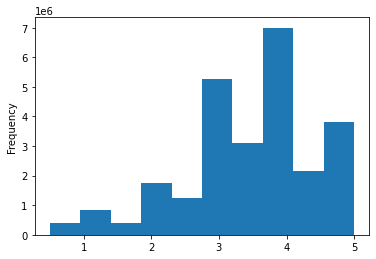

In [753]:
#Now lets examine the ratings themselves:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

The ratings all look reasonable

Now we can merge the wiki_movies df and kaggle metadata df

In [754]:
#Note that we have added suffixes to columns names so in the new df we see which came from where
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [755]:
movies_df.head()

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,English,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,English,...,1990-08-24,0.00,114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,"[English, Lao]",...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,English,...,1990-12-25,0.00,102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,English,...,1990-12-21,0.00,95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00


In [756]:
movies_df.columns

Index(['url', 'year', 'imdb_link', 'title_wiki', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Country', 'Language', 'Director',
       'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'imdb_id', 'box_office',
       'budget_wiki', 'release_date_wiki', 'running_time',
       'belongs_to_collection', 'budget_kaggle', 'genres', 'homepage', 'id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date_kaggle', 'revenue', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title_kaggle', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

Several columns are redundant so we must deal with those:


In [757]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle
# running_time             runtime
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

In [758]:
#Lets look at titles first:
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


The titles seem to match eachother pretty well. Lets look at titles that don't match:

In [759]:
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


Many of the differences appear to be due to typos but the kaggle data appears more accurate. Lets check for any rows with missing data in the kaggle data

In [760]:
#Show any rows where title_kaggle is empty or NA:
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


Kaggle data looks good so lets go with that. Now we must do the same thing for the other categories

Moving to runtime and runnnig time we will do a scatter plot but first, missing values must be filled in with 0.

<AxesSubplot:xlabel='running_time', ylabel='runtime'>

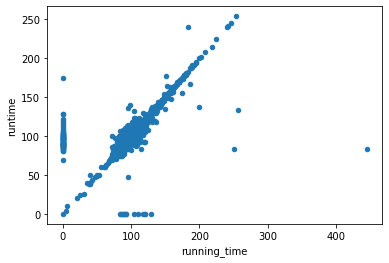

In [761]:
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

There are quite a few missing values for running_time based on the number of zeros. Based on this we go with kaggle data (runtime) and any missing values in kaggle data will be filled in with the wiki data

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

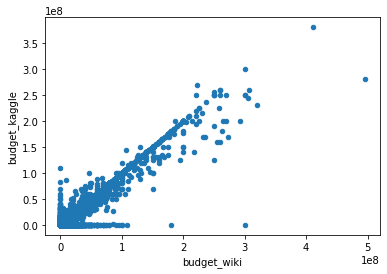

In [762]:
#Lets do the same with budget:
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

Kaggle data is missing more values but wiki data has more outliers so better to stick with kaggle and fill in missing values

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

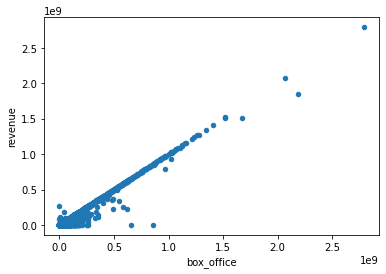

In [763]:
#Looking at boxoffice:
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

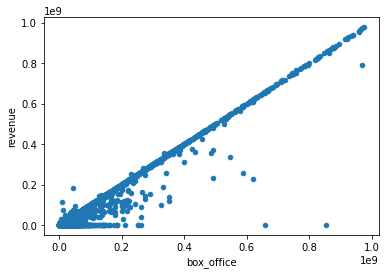

In [764]:
#Lets do the same thing again and remove that extreme value of billion:
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

Revenue has more missing values but fewer outliers so again we keep kaggle and fill in with wiki data

<AxesSubplot:xlabel='release_date_wiki'>

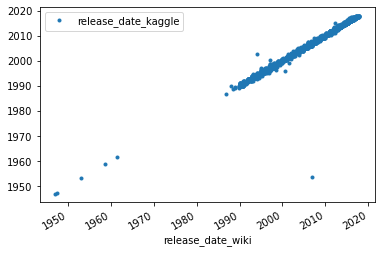

In [765]:
#Release date. A scatter plot will not work here but we can make a line plot and change style to dot::
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')


If we look closely we say one value that is WAY off (2006 vs 1955!!). Lets check the cause of this:

In [766]:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",Dean Cundey,"[December 8, 2006, (, 2006-12-08, )]",United States,English,...,1953-08-28,"30,500,000.00",118.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.20,137.00


The wiki title and kaggle title are different indicating a mistake in the merging resulting in two movies in one row. So we will drop this row:

In [767]:
#Drop the rows:
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [768]:
#Check for nulls in wiki data:
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
1008,https://en.wikipedia.org/wiki/Black_Scorpion_(...,1995,https://www.imdb.com/title/tt0112519/,Black Scorpion,NaN,"[Joan Severance, Bruce Abbott, Garrett Morris]",Geoff George,NaN,United States,NaN,...,1995-08-22,0.00,92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice has a nasty sting.,Black Scorpion,False,6.10,7.00
1061,https://en.wikipedia.org/wiki/Flirt_(1995_film),1995,https://www.imdb.com/title/tt0113080/,Flirt,NaN,"[Bill Sage, Dwight Ewell, Miho Nikaido]",Michael Spiller,NaN,"[United States, Germany, Japan, [1]]",NaN,...,1995-09-14,0.00,85.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Flirt,False,7.50,4.00
1121,https://en.wikipedia.org/wiki/Let_It_Be_Me_(19...,1995,https://www.imdb.com/title/tt0113638/,Let It Be Me,NaN,NaN,Miroslav Ondrícek,NaN,NaN,NaN,...,1995-11-17,0.00,95.00,[],Released,NaN,Let It Be Me,False,8.00,2.00
1564,https://en.wikipedia.org/wiki/A_Brooklyn_State...,1997,https://www.imdb.com/title/tt0118782/,A Brooklyn State of Mind,NaN,NaN,Ken Kelsch,NaN,NaN,NaN,...,1998-01-01,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Brooklyn State of Mind,False,5.00,1.00
1633,https://en.wikipedia.org/wiki/Highball_(film),1997,https://www.imdb.com/title/tt0119291/,Highball,NaN,"[Justine Bateman, Peter Bogdanovich, Chris Eig...",Steven Bernstein,NaN,United States,English,...,1997-01-01,0.00,110.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Highball,False,4.50,4.00
1775,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,Velocity Trap,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",Philip D. Schwartz,NaN,United States,NaN,...,1999-02-22,0.00,86.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Crime at the Speed of Light,Velocity Trap,False,4.70,6.00
2386,https://en.wikipedia.org/wiki/The_Visit_(2000_...,2000,https://www.imdb.com/title/tt0199129/,The Visit,NaN,"[Hill Harper, Billy Dee Williams, Obba Babatun...",John L. Demps Jr.,NaN,NaN,English,...,2000-01-01,0.00,107.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,NaN,The Visit,False,0.00,0.00
2786,https://en.wikipedia.org/wiki/Stevie_(2002_film),2002,https://www.imdb.com/title/tt0334416/,Stevie,NaN,NaN,"[Dana Kupper, Gordon Quinn, Peter Gilbert]",NaN,United States,English,...,2002-09-09,"97,000.00",140.00,[],NaN,NaN,Stevie,False,6.70,13.00
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",NaN,NaN,"[Denmark, USA, UK]",NaN,...,2004-09-17,0.00,109.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.90,13.00
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,NaN,United States,English,...,2006-03-11,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.50,8.00


In [769]:
#Check for nulls in kaggle data:
movies_df[movies_df['release_date_kaggle'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [770]:
#No missing values in kaggle so we will keep that data and drop wiki.

In [771]:
#Language data cannot be viewed in scatterplot so lets do a value count:
movies_df['Language'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


English                              5479
[English, Spanish]                     68
[English, French]                      35
[English, Japanese]                    25
[English, Russian]                     23
                                     ... 
[English, Norwegian]                    1
[English, Hindi]                        1
[English, Mandarin, Shanghainese]       1
[English, Quechua, Spanish]             1
[English, Lao]                          1
Name: Language, Length: 197, dtype: int64

Because some language values are stored as lists we get an error. It appears 197 rows are stored as lists. (Lists are mutable but hashes cannot be created from mutable objects). Tuples are immutable so we can convert those lists into tuples.

In [772]:
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                              5479
NaN                                   134
(English, Spanish)                     68
(English, French)                      35
(English, Japanese)                    25
                                     ... 
(English, Afrikaans, German)            1
(English, German, Yiddish)              1
(English, Arabic, Vietnamese)           1
(English, Ku)                           1
(English, Arabic, Italian, Latin)       1
Name: Language, Length: 198, dtype: int64

In [773]:
#Do the same for kaggle data (no lists so no need to convert to tuple)
movies_df['original_language'].value_counts(dropna=False)

en    5987
fr      16
es      10
it       8
de       6
pt       4
ja       4
zh       4
da       2
hi       2
ru       1
tr       1
cn       1
sv       1
ab       1
ko       1
ar       1
he       1
Name: original_language, dtype: int64

Kaggle data is easier to work with so we will use it. Its also a bit more consistent

In [774]:
#Lets compare production companies:
movies_df[['Production company(s)','production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


Kaggle data is definitely better here and we will use it

Now we have to put all this into practice:


In [775]:
#Build a function  to fill in missing data for a column pair and drop the redundant column
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [776]:
#Run the function to fill in missing kaggle data with zeros
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,English,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,English,...,1990-08-24,"2,700,000.00",114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,"[English, Lao]",...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,English,...,1990-12-25,"7,331,647.00",102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,English,...,1990-12-21,"6,939,946.00",95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,A Fantastic Woman,NaN,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,"[12 February 2017, (, 2017-02-12, ), (, Berlin...","[Chile, Germany, Spain, United States, [2]]",Spanish,...,2017-04-06,"3,700,000.00",104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,Permission,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,"[April 22, 2017, (, 2017-04-22, ), (, Tribeca ...",United States,English,...,2017-04-22,NaN,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,Loveless,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,"[18 May 2017, (, 2017-05-18, ), (, Cannes, ), ...","[Russia, France, Belgium, Germany, [3]]",Russian,...,2017-06-01,"4,800,000.00",128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,Gemini,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,"[March 12, 2017, (, 2017-03-12, ), (, SXSW, ),...",United States,English,...,2017-03-12,"200,340.00",92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.00,0.00


In [777]:
#Check for columns with only one value:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [778]:
#The video column has only one value ("false") for every row so we can drop this column

In [780]:
#Re-order the columns to be more user friendly
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]]

In [781]:
#Rename columns to be more user friendly:
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

In [783]:
movies_df.columns

Index(['imdb_id', 'kaggle_id', 'title', 'original_title', 'tagline',
       'belongs_to_collection', 'wikipedia_url', 'imdb_link', 'runtime',
       'budget', 'revenue', 'release_date', 'popularity', 'vote_average',
       'vote_count', 'genres', 'original_language', 'overview',
       'spoken_languages', 'country', 'production_companies',
       'production_countries', 'distributor', 'producers', 'director',
       'starring', 'cinematography', 'editors', 'writers', 'composers',
       'based_on'],
      dtype='object')